In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt 

# Perdecting the sale price of the budlozers 
In this note book we will perdict the price of the budlzores by having some features 

## 1.0 Proplem Defination 
  > How Can we predict the price of the budlozers givin some features ?
  
## 2.0 Data 
> we have a train and vlidate data that has been downloaded from Kaggle 
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3.0 Evaluation 
> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
* Note the goal for any regression is to minmmize the error . In this propject our goal is to minimmaize the RMSLE
## 4.0 Features 
> See the data dictionary in the data folder 



In [2]:
# Import the training and valid data 

df=pd.read_csv('Data/TrainAndValid.csv',low_memory=False)
df


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

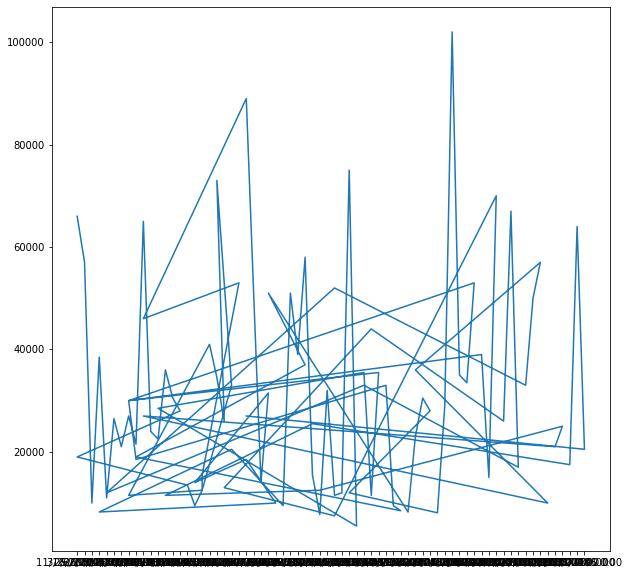

In [5]:
fig,ax =plt.subplots(figsize=(10,10))
ax.plot(df['saledate'][:100],df['SalePrice'][:100])

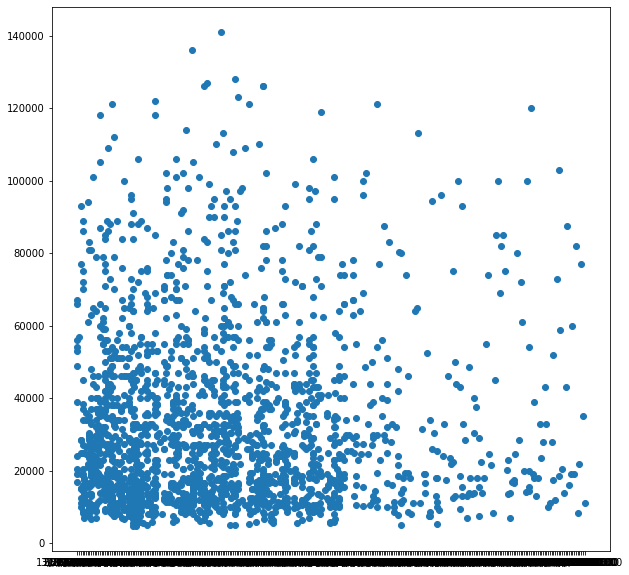

In [6]:
fig,ax =plt.subplots(figsize=(10,10))
ax.scatter(df['saledate'][:2000],df['SalePrice'][:2000])

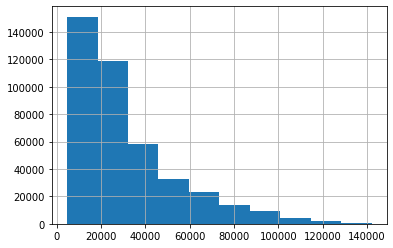

In [7]:
df['SalePrice'].hist();

### Parsing date 
* when we worke with the time series we want to chnage the dat compnent as much as possible 
* we doing this by applying panada parms parsing dat 

In [8]:
df = pd.read_csv('data/TrainAndValid.csv',low_memory=False , parse_dates=['saledate'])
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [9]:
df['saledate']

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Date')]

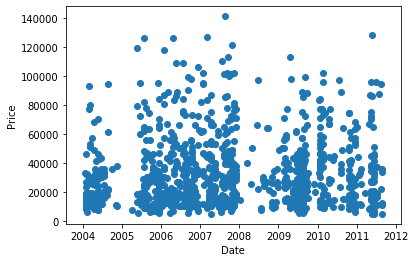

In [10]:
fig,ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])
ax.set(xlabel='Date',ylabel='Price')

In [11]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort date frame by sale date 

When working with time series is good idea to sort it by date 

In [12]:
# sort data  by date 
df.sort_values(by=['saledate'],inplace=True,ascending=True)
df['saledate']

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

## make a copy of original data fram 
* when we manuplate the data frame we have a copy 

In [13]:
df_temp = df.copy()
df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Add Date time parameters to for sale data colmn 

In [14]:
df_temp[:1]['saledate'].dt.year

205615    1989
Name: saledate, dtype: int64

In [15]:
df_temp[:1]['saledate'].dt.day

205615    17
Name: saledate, dtype: int64

In [16]:
df_temp[:1]['saledate'].dt.month

205615    1
Name: saledate, dtype: int64

In [17]:
df_temp['salemonth']=df_temp['saledate'].dt.month
df_temp['saleyear']=df_temp['saledate'].dt.year
df_temp['day']=df_temp['saledate'].dt.day
df_temp['saleDayOfWeek']=df_temp['saledate'].dt.dayofweek
df_temp['SaleDayOfYear']=df_temp['saledate'].dt.dayofyear

In [18]:
df_temp['saleDayOfWeek']

205615    1
274835    1
141296    1
212552    1
62755     1
         ..
410879    5
412476    5
411927    5
407124    5
409203    5
Name: saleDayOfWeek, Length: 412698, dtype: int64

In [19]:
## now we do not need datesale any more 
df_temp.drop('saledate',axis=1,inplace=True)

In [20]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [21]:
# Check the values of the diffrent columns 
# Which state has mose sale 
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [22]:
df_temp['state']

205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: object

## 5.0 Modelling 
let us start to do more model driven 

In [23]:
# let's bulid to bulit machine learning model 
from sklearn.ensemble import RandomForestRegressor

### first we need to conver everything to numirical and remove the misssing values 
* Convert string to catogery useing panday parameter`

In [24]:
pd.api.types.is_string_dtype(df_temp['UsageBand'])

True

In [25]:
# find the columns that contain string 
for label,content in df_temp.items():
    if(pd.api.types.is_string_dtype(content)):
       print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [1]:
# if you are wondring what df_temp.items() dose here an example 
# it seprate into key and values the first will be the key and the second will be the value 
rendom = {'key':'value','key2':'value2'}
for key,value in rendom.items():
    print(f'this is the {key}, this is the {value}')

this is the key, this is the [12, 4, 5, 3, 6]
this is the key2, this is the value2


In [27]:
# Conver string to catogeries 
for label,content in df_temp.items():
    if(pd.api.types.is_string_dtype(content)):
        df_temp[label]=content.astype("category").cat.as_ordered()
    

In [28]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [29]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [30]:
# these are the number of the catorigical state 
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [31]:
# Still we have a missing data 
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [32]:
## Save the preprocessing 
# export vurrent tmp data frame 
df_temp.to_csv('data/train_temp.csv',index=False)

## Fil the missing values 

In [33]:
# fill the num values first 
for label,content in df_temp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if(df_temp[label].isnull().sum()>0):
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [34]:
df_temp['state'].isnull()

205615    False
274835    False
141296    False
212552    False
62755     False
          ...  
410879    False
412476    False
411927    False
407124    False
409203    False
Name: state, Length: 412698, dtype: bool

In [35]:
# fill the missing with the medum 
for label,content in df_temp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if(df_temp[label].isnull().sum()>0):
            # Add abinary column to now the coumn was having missing values 
            df_temp[label+'is missing']= pd.isnull(content)
            # fill the missing value with median 
            df_temp[label]=content.fillna(content.median())  # because the median is bettet if we have outlayres.

In [36]:
# check if there is null 
for label,content in df_temp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if(df_temp[label].isnull().sum()>0):
            print(label)

In [37]:
# check to see the binary 
df_temp['auctioneerIDis missing'].value_counts()

False    392562
True      20136
Name: auctioneerIDis missing, dtype: int64

## filling the caterogical values

In [38]:
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if(df_temp[label].isnull().sum()>0):
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [39]:
# Turn categorical variables to n
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate the missin colmn 
        df_temp[label+'isMissing']= pd.isnull(content)
        #Turn Catorigical into numbers 
        df_temp[label]= pd.Categorical(content).codes+1 # we add because in catorigicall the missing valuse is -1 
        

In [40]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_ControlsisMissing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [41]:
df_temp.isnull().sum()

SalesID                       0
SalePrice                     0
MachineID                     0
ModelID                       0
datasource                    0
                             ..
Backhoe_MountingisMissing     0
Blade_TypeisMissing           0
Travel_ControlsisMissing      0
Differential_TypeisMissing    0
Steering_ControlsisMissing    0
Length: 103, dtype: int64

In [42]:
%%time 
# now that all of our data is numaric and all the values is not missing 

model =RandomForestRegressor(n_jobs=-1, random_state=42)

#fit the model 
model.fit(df_temp.drop('SalePrice',axis=1),df['SalePrice'])
 

Wall time: 9min 5s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## splitting data to train and validate 

In [43]:
df_temp.T.head(10)

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500,14000,50000,16000,22000,23500,31000,11750,63000,13000,...,35000,7500,13000,53000,39000,16000,6000,16000,55000,34000
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UsageBand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fiModelDesc,4593,1820,2348,1819,2119,2298,3126,979,2224,82,...,989,536,4261,4818,1319,2101,240,627,83,989


In [44]:
# Split into training and validation 
df_val=df_temp[df_temp.saleyear==2012]
df_train=df_temp[df_temp.saleyear!=2012]

len(df_val),len(df_train)

(11573, 401125)

In [45]:
11573*100/(11573+401125)

2.8042297273066503

In [46]:
# split data into x,y  
x,y = df_temp.drop('SalePrice',axis=1),df_temp['SalePrice']
x_train,y_train = df_train.drop('SalePrice',axis=1), df_train['SalePrice']
x_val,y_val= df_val.drop('SalePrice',axis=1),df_val['SalePrice']

In [47]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((401125, 102), (11573, 102), (401125,), (11573,))

 # we should seprtte the trainng and validation from beginning but هوا غبي 

## Bulding Evaluation function 

In [60]:
# Create Evaluation Function 
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
def rmdle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# create function to evaluate model 

def show_scores(model):
    train_preds=model.predict(x_train)
    valid_preds = model.predict(x_val)
    scores= {'Trainning Mae ': mean_absolute_error(y_train,train_preds),
            'valid mae': mean_absolute_error(y_val,valid_preds),
            'Training RMSLE': rmdle(y_train,train_preds),
             'val RMSLE': rmdle(y_val,valid_preds),
              'train ing r2': r2_score(y_train,train_preds),
               'val r2': r2_score(y_val,valid_preds)}
    return scores;
    
    

## Testing our model 

In [53]:
## We need to reduce the data to reduce the time 

# change max sample value 
 

In [66]:
%%time 
model2 =RandomForestRegressor(n_jobs=-1,max_samples=10000 )# takes just 10000 samples
model2.fit(x_train,y_train)

Wall time: 19.8 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [57]:
## it takes 24.4 seconds instead of 6 minute but it is not accurate 



In [61]:
# evalute now 
show_scores(model2)

{'Trainning Mae ': 5559.344922405733,
 'valid mae': 7165.294040438954,
 'Training RMSLE': 0.25749942514710333,
 'val RMSLE': 0.293244422400179,
 'train ing r2': 0.8606753215681558,
 'val r2': 0.8332608524820223}

In [62]:
 # try with out change max 
model =RandomForestRegressor(n_jobs=-1,)# takes just 10000 samples
model.fit(x_train,y_train)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Hyper parameter with randomize search CV 

In [72]:
%%time 
from sklearn.model_selection import RandomizedSearchCV

## Create distrbution 
rf_grid = {'n_estimators':np.arange(10,100),
            'max_depth': [None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2),
            'max_features':[0.5,1,'sqrt','auto'],
          'max_samples':[10000]}

# initiate Randomize Search mode; 
rs_model =RandomizedSearchCV(RandomForestRegressor(n_jobs= -1,
                                                  random_state=42),rf_grid,n_iter=3,
                              cv=5, verbose=True )

# fitting

rs_model.fit(x_train,y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.6min finished


Wall time: 3min 46s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [65]:
show_scores(model) ## its much better 

{'Trainning Mae ': 1577.0383525334998,
 'valid mae': 6114.228632161064,
 'Training RMSLE': 0.0841783712257784,
 'val RMSLE': 0.25474904985517444,
 'train ing r2': 0.9875880298173212,
 'val r2': 0.8728126358691788}

In [73]:
rs_model.best_params_

{'n_estimators': 62,
 'min_samples_split': 8,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [74]:
show_scores(rs_model)  # worse 

{'Trainning Mae ': 6698.053036406622,
 'valid mae': 8170.726105323104,
 'Training RMSLE': 0.2988768658619128,
 'val RMSLE': 0.3251301114981561,
 'train ing r2': 0.8031754720319141,
 'val r2': 0.7775420154488412}

## Train amodel with best hyper parameter 
**note** these found by 100 iterations it takes 3 hours 


In [76]:
%%time 
# most ideal hyperparameter 
ideal_model =RandomForestRegressor(n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_features=0.5,
                                  n_jobs=-2,
                                   max_samples=None,random_state=42)

ideal_model.fit(x_train,y_train)

Wall time: 2min 3s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-2, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [77]:
show_scores(ideal_model) # mine is better 

{'Trainning Mae ': 2955.4815660106988,
 'valid mae': 5961.36535611684,
 'Training RMSLE': 0.144755813440218,
 'val RMSLE': 0.24611703146487926,
 'train ing r2': 0.9587255041774946,
 'val r2': 0.8819134649254987}

## make predection on test data 


In [78]:
# import test data 
df_test = pd.read_csv('data/Test.csv',low_memory=False,parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


## pre processing the data

In [79]:
def preprocess(df):
    df['salemonth']=df['saledate'].dt.month
    df['saleyear']=df['saledate'].dt.year
    df['day']=df['saledate'].dt.day
    df['saleDayOfWeek']=df['saledate'].dt.dayofweek
    df['SaleDayOfYear']=df['saledate'].dt.dayofyear
    df.drop('saledate',axis=1,inplace=True)
    
    # fill the numric rows with data 
    for label,content in df.items():
        if(pd.api.types.is_numeric_dtype(content)):
            if(df[label].isnull().sum()>0):
            # Add abinary column to now the coumn was having missing values 
                df[label+'is missing']= pd.isnull(content)
            # fill the missing value with median 
                df[label]=content.fillna(content.median())
    # fill the catoregical data 
    for label,content in df.items():
        if(pd.api.types.is_string_dtype(content)):
            df[label]=content.astype("category").cat.as_ordered()
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate the missin colmn 
            df[label+'isMissing']= pd.isnull(content)
        #Turn Catorigical into numbers 
            df[label]= pd.Categorical(content).codes+1 # we add because in catorigicall the missing valuse is -1 
    
    return df 
    

In [80]:
df_t=preprocess(df_test)

In [85]:
df_t.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_WidthisMissing,Stick_LengthisMissing,ThumbisMissing,Pattern_ChangerisMissing,Grouser_TypeisMissing,Backhoe_MountingisMissing,Blade_TypeisMissing,Travel_ControlsisMissing,Differential_TypeisMissing,Steering_ControlsisMissing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [84]:
x_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_WidthisMissing', 'Stick_LengthisMissing',
       'ThumbisMissing', 'Pattern_ChangerisMissing', 'Grouser_TypeisMissing',
       'Backhoe_MountingisMissing', 'Blade_TypeisMissing',
       'Travel_ControlsisMissing', 'Differential_TypeisMissing',
       'Steering_ControlsisMissing'],
      dtype='object', length=102)

In [86]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_WidthisMissing,Stick_LengthisMissing,ThumbisMissing,Pattern_ChangerisMissing,Grouser_TypeisMissing,Backhoe_MountingisMissing,Blade_TypeisMissing,Travel_ControlsisMissing,Differential_TypeisMissing,Steering_ControlsisMissing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [87]:
# we can find how the colmns differ useing sets 

set(x_train.columns)-set(df_test.columns)

{'auctioneerIDis missing'}

In [89]:
# manually adjuste it (is missin coulmns) غبااء المفروض من البداية تحذف كل 
df_test['auctioneerIDis missing']=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_LengthisMissing,ThumbisMissing,Pattern_ChangerisMissing,Grouser_TypeisMissing,Backhoe_MountingisMissing,Blade_TypeisMissing,Travel_ControlsisMissing,Differential_TypeisMissing,Steering_ControlsisMissing,auctioneerIDis missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [90]:
# evaluate 
test_preds1 =ideal_model.predict(df_test)
test_preds1

array([25222.62984064, 20327.08502037, 53021.64779557, ...,
       16336.92330128, 18413.50051031, 30559.83877234])

In [94]:
# format prediction int the same as the kagle is after 
# they need it dataframe with sale id and sale price 
df_preds = pd.DataFrame()
df_preds['SalesId']=df_test['SalesID']
df_preds['SalesPrice']=test_preds1
df_preds

,SalesId,SalesPrice
0,1227829,25222.629841
1,1227844,20327.085020
2,1227847,53021.647796
3,1227848,63900.905107
4,1227863,46029.470831
...,...,...
12452,6643171,46426.593397
12453,6643173,15587.045401
12454,6643184,16336.923301
12455,6643186,18413.500510


In [95]:
# export to csv 
df_preds.to_csv('data/test prediction',index=False)

## feature importance 
feature importance seek to figure out which diffrent attrbutes of the data were most importance when it comes 
to predeting the target (Sales Price )

In [96]:
# find feature omportance 
ideal_model.feature_importances_

array([3.15044145e-02, 1.73104882e-02, 4.90967504e-02, 1.78211593e-03,
       3.35311792e-03, 2.13344061e-01, 3.15430206e-03, 1.03639916e-03,
       4.63313269e-02, 3.82782442e-02, 5.60965055e-02, 4.51656600e-03,
       1.54733007e-02, 1.51203666e-01, 4.57369139e-02, 5.95284041e-03,
       4.25569412e-03, 2.05444316e-03, 2.65873701e-03, 5.74208597e-02,
       4.17561018e-04, 1.26735600e-04, 7.96292500e-04, 2.04997081e-04,
       1.27650606e-03, 2.48208750e-05, 2.22344563e-03, 2.28692809e-03,
       3.17959661e-03, 4.56572083e-03, 5.41004417e-03, 1.95166497e-03,
       3.44369935e-03, 8.25341181e-04, 2.21627427e-03, 2.69975815e-03,
       8.82935100e-04, 1.37437217e-02, 1.44548854e-03, 3.53181974e-03,
       9.73196111e-04, 8.39386975e-04, 2.75366878e-03, 5.61547479e-04,
       5.00082266e-04, 3.97575218e-04, 2.31030432e-04, 2.71598346e-03,
       7.57709279e-04, 2.39627613e-04, 2.13140732e-04, 3.83221656e-03,
       7.45462853e-02, 5.59031055e-03, 2.91089542e-03, 9.88770563e-03,
      

In [105]:
# helper function for plotting feature importance 
def plot_features(columns,importance,n=20):
    df=(pd.DataFrame({'feature':columns,'feature imortance':importance}).
       sort_values('feature imortance',ascending =False)
       .reset_index(drop=True))
    # plott 
    fig,ax = plt.subplots()
    ax.barh(df['feature'][:n],df['feature imortance'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('feature importance')
    ax.invert_yaxis()
     

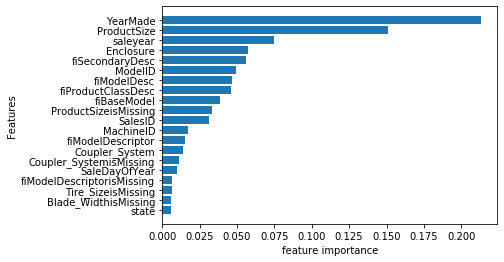

In [106]:
plot_features(x_train.columns, ideal_model.feature_importances_)

In [112]:
df['ProductSize'].value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

In [113]:
df['YearMade'].value_counts()

1000    39391
2005    22096
1998    21751
2004    20914
1999    19274
        ...  
1947        1
1942        1
1937        1
2012        1
2013        1
Name: YearMade, Length: 73, dtype: int64

# ** Why might knowin the feature importance is important?